This file needs requires external data!

(Run on workstation)

In [8]:
import xarray as xr
import pyproj
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import datetime
import cmocean as cmo
import glob
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import numpy as np
import copy
import sys,os

sys.path.append('../src')
import utils as ut

In [2]:
mpl.rcParams['figure.subplot.wspace'] = .2
mpl.rcParams['figure.subplot.left'] = .1
mpl.rcParams['figure.subplot.right'] = .9
mpl.rcParams['figure.figsize'] = (15,7)

cmap = plt.get_cmap('nipy_spectral').copy()

vmins = {}
vmaxs = {}
vmins['sossheig'] = -2
vmaxs['sossheig'] = 1.2

vmins['zos'] = -2
vmaxs['zos'] = 1.2

vmins['vosaline'] = 33
vmaxs['vosaline'] = 36

vmins['sos'] = 33
vmaxs['sos'] = 36

vmins['votemper'] = -2
vmaxs['votemper'] = 25

vmins['tos'] = -2
vmaxs['tos'] = 25

vmins['vozocrtx'] = -.5
vmaxs['vozocrtx'] = .5

vmins['vomecrty'] = -.5
vmaxs['vomecrty'] = .5



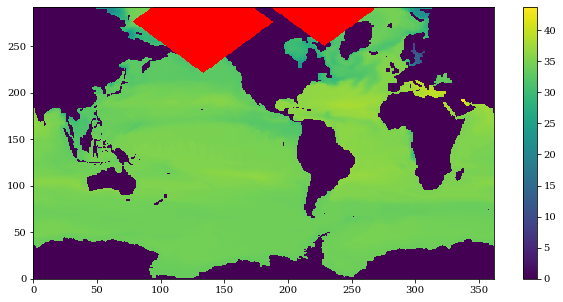

In [30]:
mpl.rcParams['figure.subplot.wspace'] = .2
mpl.rcParams['figure.subplot.left'] = .1
mpl.rcParams['figure.subplot.right'] = .9
mpl.rcParams['figure.figsize'] = (10,5)

run = 'half'

cmap = plt.get_cmap('viridis').copy()
cmap.set_bad('r')

fname = f'../data/ecefiles/errorfiles/output.abort_{run}.nc'
ds = xr.open_dataset(fname)
#print(ds.variables)
#ds = ds.isel(y=slice(0,105))
ds = ds.isel(deptht=0)
lat = ds['nav_lat']
lon = ds['nav_lon']
#var = ds['sossheig'].isel(time_counter=0)
#var = ds['sithic'].isel(time_counter=0)
var = ds['vosaline'].isel(time_counter=0)

fig = plt.figure()

ax = fig.add_subplot()
im = ax.pcolormesh(var,cmap=cmap)
plt.colorbar(im)
plt.show()

ds.close()

In [18]:
#Arctic sea ice thickness and salinity

var1,var2 = 'sithic','zos'
run0,run1 = 'n011','half'

#sithic:
vmin1 = [0,0,-5]
vmax1 = [15,15,5]
#sos:
#vmin2 = [20,20,-5]
#vmin2 = [35,35,5]
#zos:
vmin2 = [-2,-2,-.2]
vmax2 = [1,1,.2]

cmaps = ['nipy_spectral','nipy_spectral','cmo.balance']

mpl.rcParams['figure.subplot.wspace'] = .1
mpl.rcParams['figure.subplot.hspace'] = .1
mpl.rcParams['figure.subplot.left'] = .1
mpl.rcParams['figure.subplot.right'] = .9
mpl.rcParams['figure.figsize'] = (7,7)

prefix = f'Arctic_monthly_{var1}_{var2}_{run1}'

fnames0 = sorted(glob.glob(f'../data/ecefiles/{run0}/{run0}*icemod.nc'))[38:]
gnames0 = sorted(glob.glob(f'../data/ecefiles/{run0}/{run0}*grid_T.nc'))[38:]
fnames1 = sorted(glob.glob(f'../data/ecefiles/{run1}/{run1}*icemod.nc'))
gnames1 = sorted(glob.glob(f'../data/ecefiles/{run1}/{run1}*grid_T.nc'))

titles = ['ctrl',run1,f'{run1}-ctrl']

nmonths = 0
for fname in fnames1:
    ds = xr.open_dataset(fname)
    nmonths += len(ds.time_counter)
    ds.close()

if os.path.exists(f'../videos/{prefix}.mp4'):
    print('Careful! Video already exists, will be overwritten')
    
t0 = 0
for f,fname in enumerate(fnames1):
    ds1 = xr.open_dataset(fname)
    ds1 = ds1.isel(y_grid_T=slice(200,-1))
    lat = ds1['nav_lat_grid_T']
    lon = ds1['nav_lon_grid_T']
    ds0 = xr.open_dataset(fnames0[f])
    ds0 = ds0.isel(y_grid_T=slice(200,-1))
    dds1 = xr.open_dataset(gnames1[f])
    llat = dds1['nav_lat']
    llon = dds1['nav_lon']    
    dds1 = dds1.isel(y=slice(200,-1))
    dds0 = xr.open_dataset(gnames0[f])  
    dds0 = dds0.isel(y=slice(200,-1))    
    
    for t,tt in enumerate(ds1.time_counter):
        vvar0 = ds0['sithic'].isel(time_counter=t)
        vvar1 = ds1['sithic'].isel(time_counter=t)
        wvar0 = dds0['zos'].isel(time_counter=t)
        wvar1 = dds1['zos'].isel(time_counter=t)        
        fig = plt.figure()
        for v,var in enumerate([vvar0,vvar1,vvar1-vvar0]):
            ax = fig.add_subplot(2,3,v+1,projection=ccrs.NorthPolarStereo())
            ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
            im = ax.scatter(lon,lat,3,c=np.where(var==0,np.nan,var),transform=ccrs.PlateCarree(),cmap=cmaps[v],lw=0,vmin=vmin1[v],vmax=vmax1[v])
            
            ax.coastlines(lw=.1)
            ax.set_title(titles[v])
            plt.colorbar(im,orientation='horizontal')
        for v,var in enumerate([wvar0,wvar1,wvar1-wvar0]):
            ax = fig.add_subplot(2,3,v+1+3,projection=ccrs.NorthPolarStereo())
            ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
            im = ax.scatter(lon,lat,3,c=np.where(var==0,np.nan,var),transform=ccrs.PlateCarree(),cmap=cmaps[v],lw=0,vmin=vmin2[v],vmax=vmax2[v])
            
            ax.coastlines(lw=.1)
            plt.colorbar(im,orientation='horizontal')         
                
        fig.suptitle(str(tt.values)[:7])
        savename = f'../videos/{prefix}_{t0:03.0f}.png'
        plt.savefig(savename,dpi=150)
        print('Saved',t0,'of',nmonths,'months',end='\r')
        t0 += 1
        plt.close()
        
    ds0.close()
    ds1.close()
    dds0.close()
    dds1.close()
#Make video
os.system(f'ffmpeg -y -r 4 -f image2 -s 1920x1080 -i ../videos/{prefix}_%03d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p ../videos/{prefix}.mp4')
os.system(f'rm -r ../videos/{prefix}*.png')

ffmpeg version 4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10 (GCC)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -flto=auto -ffat-lto-objects -fexceptions -g -grecord-gcc-switches -pipe -Wall -Werror=format-security -Wp,-D_FORTIFY_SOURCE=2 -Wp,-D_GLIBCXX_ASSERTIONS -specs=/usr/lib/rpm/redhat/redhat-hardened-cc1 -fstack-protector-strong -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -m64 -mtune=generic -fasynchronous-unwind-tables -fstack-clash-protection -fcf-protection' --extra-ldflags='-Wl,-z,relro -Wl,--as-needed -Wl,-z,now -specs=/usr/lib/rpm/redhat/redhat-hardened-ld ' --extra-cflags=' -I/usr/include/rav1e' --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libvo-amrwbenc --enable-version3 --enable-bzlib --disable-crystalhd --enable-fontconfig --enable-frei0r --enable-gcrypt --enabl

0